## Project No2 - Concentration Theorems

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import matplotlib as mpl

mpl.rcParams['font.size'] = 16

We will be working with concentration results. explore some aspects of -
have series of RV X1, Xn and they come from dist F (iid)
P(X1>=t) = P(X2>=t) FOR ALL t

expectation of x1, x2, ... xn all same equal to mu

we try to understand what happens to sample mean.

1. when n goes to infinity then x bar converges in probability to the population mean mu - weak law of large nos
for all eplison, P(|Xn bar minus mu| > epsilon) goes to 0 as n goes to infinity
2. stronger convergence - sequence of Xn bar converges to mu as a sequence
3. central limit theorem, convergence in distribution to normal(0,1)

scale the random variable

### 0. Setup 

We will consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$. We define the sample mean as 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
The objective of this project is to study the behavior of $\bar X_n$ as $n \rightarrow \infty$. 

### 1. Law of Large Numbers

Here we are going to focus in the convergence in probability and almost surely of the sample mean of i.i.d. random variables. Remember that a sequence of random variables $Y_1, Y_2, \ldots$ converges in probability to a random variable $Y$ if for every $\epsilon > 0$ we have 
$$
\lim_{n \rightarrow \infty} \mathbb P \left( | Y_n - Y | > \epsilon \right) = 0
$$
The **weak law of large numbers** states 

> The sample mean $\bar X_n$ converges in probability to $\mu$.

The **strong law of large numbers** states a more strict sense in which this convergence happens

> The sample mean $\bar X_n$ converges almost surely to $\mu$. 

Let's see how these two behave numerically.

#### 1.1. Gaussian case

Consider the simple case where $X_i \sim N(0,1)$. Compute the sample mean for increasing values of $n$ and show how the sample mean converges to $0$. To do this, you can simply show a plot of the sample mean as a function of $n$. 

***Tip:*** You can compute the sample mean of a normal random variable by simply doing
```python
n = 100
one_sample_mean = np.mean(np.random.normal(loc=0.0, scale=1.0, size=n))
```
The same works if you want to compute a total of `n_sim` sample means:
```python
n = 100
n_sim = 500
many_sample_means = np.mean(np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim)), axis=0)
```

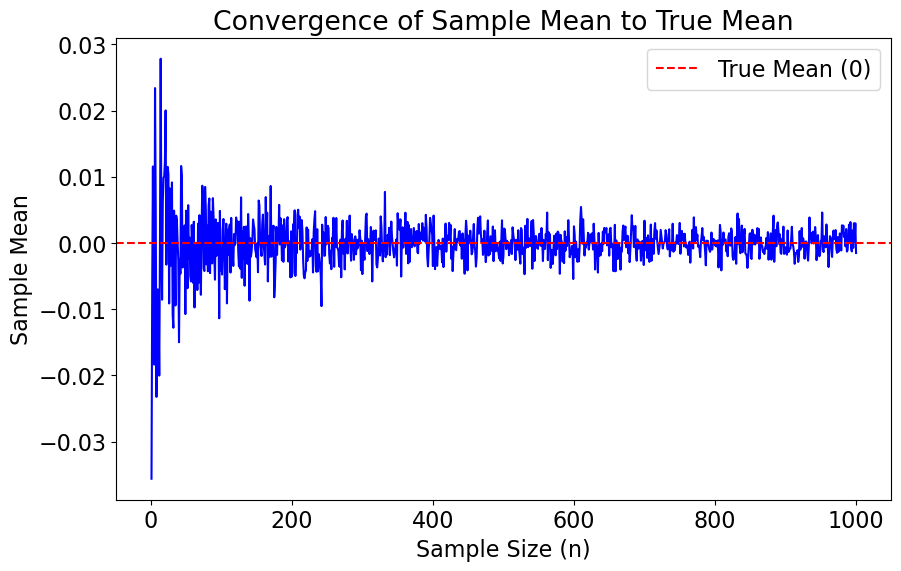

In [2]:
# Parameters
n_sim = 500  # Number of simulations
n = 1000  # Maximum sample size

# Initialize an array to store sample means for each sample size
sample_means = []

# Generate sample means for increasing sample sizes
for n in range(1, n + 1):
    samples = np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim))
    means = np.mean(samples, axis=0)
    sample_means.append(np.mean(means))
    
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), sample_means, linestyle='-', color='b')
plt.axhline(0, color='r', linestyle='--', label='True Mean (0)')
plt.xlabel('Sample Size (n)')
plt.ylabel('Sample Mean')
plt.title('Convergence of Sample Mean to True Mean')
plt.legend()
plt.show()

#### 1.2. Beta distribution

Now, repeat the same experiment but for a Beta distribution with parameters of your choice. Remember that the mean of a Beta distribution with parameters $a$ and $b$ is $a / (a+b)$. 

For this section, it is important that you compute the sample mean as you increase the value of $n$ *for the same realization of the random variables $X_i$*. To do this, first sample all the values of $X_1, X_2, \ldots, X_{n_{max}}$ just one time and then compute the partial averages $\bar X_n$ for different values of $n \leq n_{max}$. 

Make this plot is logarithmic scale for both axes. This is how your solution should look like. If you kernel dies when running the simulations, try reducing the total number of samples.

<img src="solution_1_2.png" alt="Solution" />

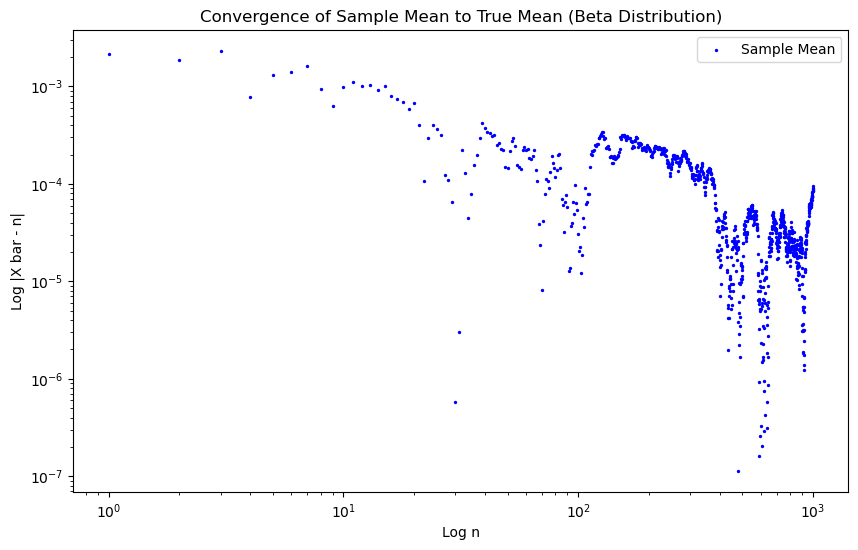

In [45]:
# Parameters
n_max = 1000  # Maximum sample size
a = 1        # Beta distribution parameter
b = 1        # Beta distribution parameter

# Generate random variables 𝑋𝑖 once for the maximum value of n_max
samples_max = np.random.beta(a, b, size=(n_max, n_sim))

# Initialize an array to store sample means for different sample sizes
sample_means = []

# Calculate the true mean for the Beta distribution with parameters a and b
true_mean = a / (a + b)

# Compute the partial averages 𝑋¯𝑛 for different values of n ≤ n_max
for n in range(n_max):
    partial_samples = samples_max[0:(n+1)]  # Take the first n rows
    means = np.mean(partial_samples)
    sample_means.append(abs(means - true_mean)) 

# Create a plot without markers
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(1, n_max + 1), sample_means, color='b', label='Sample Mean', s=2)
plt.xlabel('Log n')
plt.ylabel('Log |X bar - n|')
plt.title('Convergence of Sample Mean to True Mean (Beta Distribution)')
plt.legend()
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

**To Discuss:** When doing this calculations, what time of convergence are we studying? almost surely or in probability? 

**To Discuss:** Can you identify the general trend in the previous plot? Can you give meaning the low peaks in the plot? 

#### 1.3. Compute the probability

Now, instead of evaluating the value of $\bar X_n$, compute the probability $\mathbb P \left( | \bar X_n | > \epsilon \right)$ for Gaussian Normal (0,1) for different values of $n$ and $\epsilon$ and plot the result as a function of $n$. What do you observe? See the next item for an example of the solution for this problem.

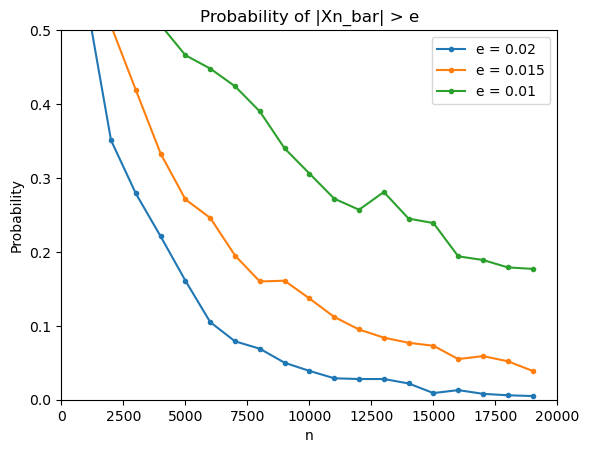

In [27]:
# sample from N(0,1)

def find_prob(probs, n_sim, n, epsilon):
    for i in range(0,n,1000):
        curr_means = []
        for j in range(n_sim):
            curr_mean = np.abs(np.mean(np.random.normal(loc=0.0, scale=1.0, size=(i+1))))
            curr_means.append(curr_mean)
        prob = np.mean([mean > epsilon for mean in curr_means])
        probs.append(prob)
    return probs

n_sim = 1000
n = 20000
e1 = 0.02
e2 = 0.015
e3 = 0.01
probs_e1 = []
probs_e2 = []
probs_e3 = []

probs_e1 = find_prob(probs_e1, n_sim, n, e1)
probs_e2 = find_prob(probs_e2, n_sim, n, e2)
probs_e3 = find_prob(probs_e3, n_sim, n, e3)

plt.plot(np.arange(1, n+1, 1000), probs_e1, marker = 'o', markersize = 3, label = "e = 0.02")
plt.plot(np.arange(1, n+1, 1000), probs_e2, marker = 'o', markersize = 3, label = "e = 0.015")
plt.plot(np.arange(1, n+1, 1000), probs_e3, marker = 'o', markersize = 3, label = "e = 0.01")
plt.legend(loc = "upper right")
plt.title("Probability of |Xn_bar| > e")
plt.ylabel("Probability")
plt.xlabel("n")
plt.xlim(0,n)
plt.ylim(0,0.5)
plt.show()

#### 1.4. Concentration bounds

Repeat the same plot that in the last item and show how it compares with the upper bound obtain from using Chebyshev's inequality
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq \frac{1}{n \epsilon^2}
$$
and the Chernoff bound
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq 2 \exp \left( - \frac{\epsilon^2 n}{2} \right)
$$
At the end of the day, you should obtain something like this, do this for Gaussian Normal (0,1)

<img src="solution_1_34.png" alt="Solution" />

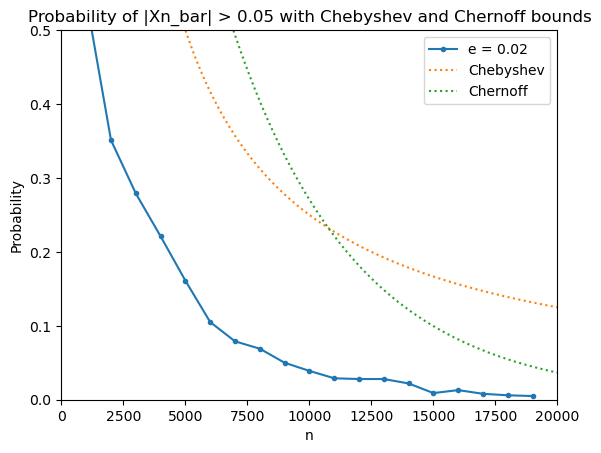

In [28]:
import numpy as np
import matplotlib.pyplot as plt

n=20000
e = 0.02
nn = np.arange(1, n+1)
chebyshev = 1/(nn*e*e)
chernoff = 2 * np.exp(-(e*e*nn/2))

plt.plot(np.arange(1, n+1, 1000), probs_e1, marker = 'o', markersize = 3, label = "e = 0.02")
plt.plot(nn, chebyshev, linestyle=':', marker ='', label = "Chebyshev")
plt.plot(nn, chernoff, linestyle=':', marker ='', label = "Chernoff")
plt.title("Probability of |Xn_bar| > 0.05 with Chebyshev and Chernoff bounds")
plt.legend()
plt.ylabel("Probability")
plt.xlabel("n")
plt.xlim(0,n)
plt.ylim(0,0.5)
plt.show()

# chebyshev is of order o(1/n) ignoring the constants
# chernoff is of order o(e^-n)
# chernoff decays fasters and is better for provig theorems since it is stronger
# we can bound by min(chernoff, chebyshev) since they are tighter in different areas
# asymptotically chernoff behves better than chebyshev
# we can prove somethings with chernoff but might not be able to prove it with chebyshev

### 2. Central Limit theorem 

Let's first state one more time the Central Limit Theorem

> Consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$ and finite variance $\mathbb{V}ar[X_1] = \sigma^2$. If call 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
the sample mean, then 
$$
\sqrt{n} \frac{\bar X_n - \mu}{\sigma}
$$
converges in distribution to the standard Normal distribution $N(0,1)$.



#### 2.1. Continuous case

Pick a continuous random variable with bounded second moment and show that the central limit theorem holds numerically. Sample the sample mean $\bar X_n$ for various numbers of $n$ and show that $\sqrt{n}(\bar X_n - \mu) / \sigma$ converges to the standard normal distribution.

This is how the solution should look like for the mean of Beta distributions and a total of 10000 simulations. 

<img src="solution_2_1.png" alt="Solution" />

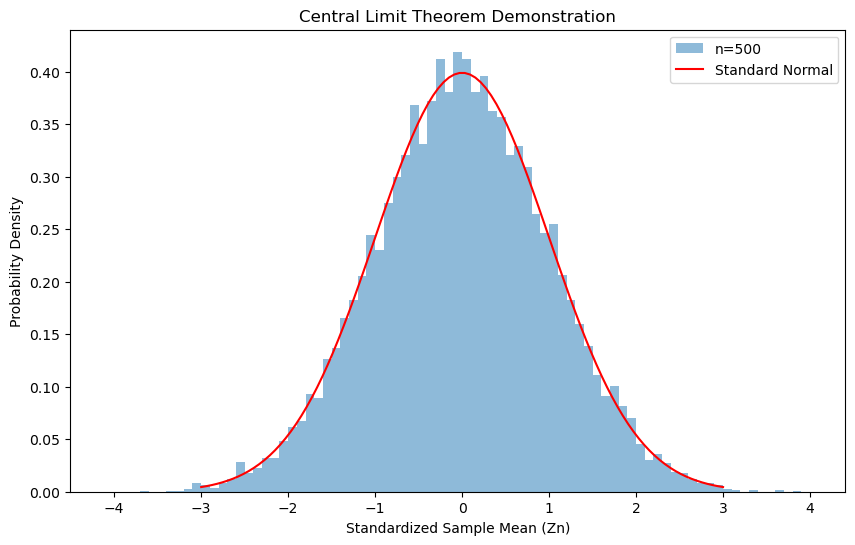

In [41]:
# gaussian distribution - CLT
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Beta distribution
a = 2
b = 5

# Number of simulations
n_sim = 10000

# Range of sample sizes (n)
sample_sizes = [500]

# Initialize an array to store standardized sample means
standardized_means = []

# Simulate and calculate standardized means for different sample sizes
for n in sample_sizes:
    # Generate random samples from the Beta distribution (a, b)
    samples = np.random.beta(a, b, size=(n, n_sim))
    # Calculate sample means
    means = np.mean(samples, axis=0)
    # Calculate the population mean and standard deviation
    population_mean = a / (a + b)
    population_std = np.sqrt((a * b) / ((a + b)**2 * (a + b + 1)))
    # Standardize the sample means
    z_n = np.sqrt(n) * (means - population_mean) / population_std
    standardized_means.append(z_n)

# Create histograms for standardized sample means
plt.figure(figsize=(10, 6))
for i, n in enumerate(sample_sizes):
    plt.hist(standardized_means[i], bins=np.arange(-4.1, 4.1, 0.1), density=True, alpha=0.5, label=f'n={n}')
    
# Plot the standard normal distribution for comparison
x = np.linspace(-3, 3, 100)
pdf_standard_normal = 1 / (np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, pdf_standard_normal, 'r-', label='Standard Normal')
    
plt.xlabel('Standardized Sample Mean (Zn)')
plt.ylabel('Probability Density')
plt.title('Central Limit Theorem Demonstration')
plt.legend()
plt.show()

#### 2.2. Discrete case

Repeat the experiment but now with a discrete random variable. When plotting the histogram, be careful on how you define the bins. 


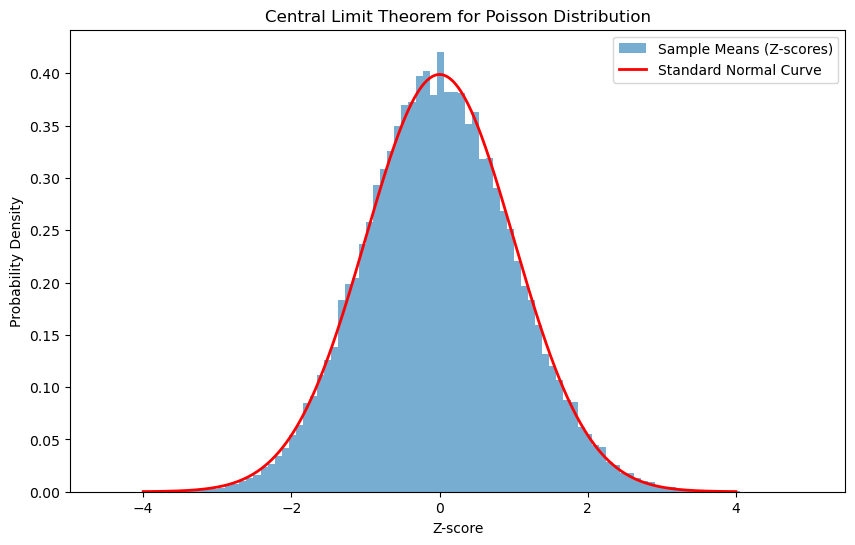

In [47]:
# discrete poisson distribution - CLT
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n_sim = 10000  # Number of simulations
n_max = 100   # Maximum sample size
lambda_param = 5.0  # Mean parameter for Poisson distribution

# Initialize an array to store Z-scores
z_scores = []

# Generate random samples from the Poisson distribution
for n in range(1, n_max + 1):
    samples = np.random.poisson(lambda_param, size=(n, n_sim))
    means = np.mean(samples, axis=0)
    
    # Calculate Z-scores
    z = (means - lambda_param) / (np.sqrt(lambda_param) / np.sqrt(n))
    z_scores.append(z)

# Create a histogram of Z-scores
plt.figure(figsize=(10, 6))
plt.hist(np.concatenate(z_scores), bins=100, density=True, alpha=0.6, label='Sample Means (Z-scores)')
# Overlay a standard normal curve
x = np.linspace(-4, 4, 1000)  # Generate x-values for the curve
y = norm.pdf(x, loc=0, scale=1)  # Compute the PDF of the standard normal distribution
plt.plot(x, y, 'r-', linewidth=2, label='Standard Normal Curve')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Central Limit Theorem for Poisson Distribution')
plt.legend()
plt.show()

#### 2.3. [Optional] Distribution without second moment

Consider now a distribution with defined mean without finite second moment. In principle, the central limit theorem does not apply for this case. Generate a simulation of the sample mean for a distribution with these properties and try to understand the behavior of the scaled sample mean as $n$ increases. You may find interesting the reading about [stable distributions](https://en.wikipedia.org/wiki/Stable_distribution).

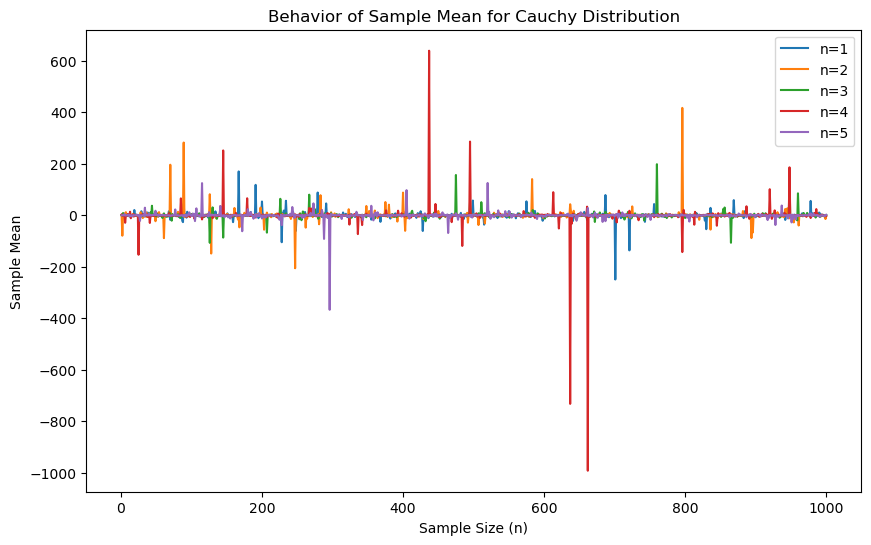

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_sim = 1000    # Number of simulations
n_max = 1000    # Maximum sample size
cauchy_loc = 0  # Location parameter for Cauchy distribution
cauchy_scale = 1  # Scale parameter for Cauchy distribution

# Initialize an array to store sample means
sample_means = []

# Generate random samples from the Cauchy distribution
for n in range(1, n_max + 1):
    samples = np.random.standard_cauchy(size=(n, n_sim))
    means = np.mean(samples, axis=0)
    sample_means.append(means)

# Create a plot to observe the behavior
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(range(1, n_max + 1), sample_means[i], label=f'n={i+1}')

plt.xlabel('Sample Size (n)')
plt.ylabel('Sample Mean')
plt.title('Behavior of Sample Mean for Cauchy Distribution')
plt.legend()
plt.show()

# it varies wildly no matter how large 𝑛 becomes but there is no trend and every time we run it,
# it gives a variedly different behaviour

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Aarushi Somani (aarushi-somani-19)
- Member No2: Meichen Chen (meichen001)
- Member No3: